# Task A_Median_Filter

In [4]:
import numpy as np
import cv2
from skimage.util import random_noise
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
from skimage.metrics import structural_similarity as ssim
import os

#Adjust figure sizes 
rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

C:\Users\Mira\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Mira\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Mira\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


##  Median Filter

In [2]:
def Median_filter(noisy_im_dir, org_im_dir, img_to_print):
    lst_mse_noisy = []
    lst_mse_3_filt = []
    lst_mse_5_filt = []
    lst_mse_7_filt = []

    lst_ssim_noisy = []
    lst_ssim_3x3_filt = []
    lst_ssim_5x5_filt = []
    lst_ssim_7x7_filt = []

    for e, i in enumerate(os.listdir(noisy_im_dir)):
        
        img_name = i.split(".")[0]+".png"

        noisy_img = cv2.cvtColor(cv2.imread(os.path.join(noisy_im_dir, img_name)), cv2.COLOR_BGR2RGB)    # Noisy Images
        org_img   = cv2.cvtColor(cv2.imread(os.path.join(org_im_dir, img_name)), cv2.COLOR_BGR2RGB)      # Original Images

        #------------------------------------------------------------
        # Apply Filters
        #------------------------------------------------------------

        img_median_3_filt = cv2.medianBlur(noisy_img, 3)                   # Median filter with kernel 3*3
        img_median_5_filt = cv2.medianBlur(noisy_img, 5)                   # Median filter with kernel 5*5
#         img_median_7_filt = cv2.medianBlur(noisy_img, 7)                   # Median filter with kernel 7*7

        #------------------------------------------------------------
        # Mean Squared Error between Original image and filtered images
        #------------------------------------------------------------

        mse_noisy = np.mean((org_img - noisy_img)**2).astype(np.uint8)
        lst_mse_noisy.append(mse_noisy)
        
        mse_3_filt = np.mean((org_img - img_median_3_filt)**2).astype(np.uint8)
        lst_mse_3_filt.append(mse_3_filt)
        
        mse_5_filt = np.mean((org_img - img_median_5_filt)**2).astype(np.uint8)
        lst_mse_5_filt.append(mse_5_filt)
        
#         mse_7_filt = np.mean((org_img - img_median_7_filt)**2).astype(np.uint8)
#         lst_mse_7_filt.append(mse_7_filt) 

        #------------------------------------------------------------------------------------
        #Calcalte Structured Similarity Index with Original image and filtered images
        #------------------------------------------------------------------------------------
        ssim_noisy = ssim(org_img, noisy_img, multichannel=True, data_range=noisy_img.max() - noisy_img.min())
        lst_ssim_noisy.append(ssim_noisy)
        
        ssim_3x3_filt = ssim(org_img, img_median_3_filt, multichannel=True, data_range=img_median_3_filt.max() - img_median_3_filt.min())
        lst_ssim_3x3_filt.append(ssim_3x3_filt)
        
        ssim_5x5_filt = ssim(org_img, img_median_5_filt, multichannel=True, data_range=img_median_5_filt.max() - img_median_5_filt.min())
        lst_ssim_5x5_filt.append(ssim_5x5_filt)
        
#         ssim_7x7_filt = ssim(org_img, img_median_7_filt, multichannel=True, data_range=img_median_7_filt.max() - img_median_7_filt.min())
#         lst_ssim_7x7_filt.append(ssim_7x7_filt)

        if e==img_to_print:
            # Display the filtered image
            #------------------------------------------------------------
            # Display images
            #------------------------------------------------------------
            rcParams['figure.figsize'] = [12, 8]
            plt.rcParams['figure.dpi'] = 100 
            
            plt.subplot(131), plt.imshow(noisy_img)
            plt.title('Noisy Image'), plt.xticks([]), plt.yticks([])
            plt.xlabel(f'MSE: {mse_noisy}, SSIM: {ssim_noisy:.2f}')

            plt.subplot(132), plt.imshow(img_median_3_filt)
            plt.title('Median 3x3 filtered img'), plt.xticks([]), plt.yticks([])
            plt.xlabel(f'MSE: {mse_3_filt}, SSIM: {ssim_3x3_filt:.2f}')

            plt.subplot(133), plt.imshow(img_median_5_filt)
            plt.title('Median 5x5 filtered img'), plt.xticks([]), plt.yticks([])
            plt.xlabel(f'MSE: {mse_5_filt}, SSIM: {ssim_5x5_filt:.2f}')

#             plt.subplot(144), plt.imshow(img_median_7_filt)
#             plt.title('Median 7x7 filtered img'), plt.xticks([]), plt.yticks([])
#             plt.xlabel(f'MSE: {mse_7_filt}, SSIM: {ssim_7x7_filt:.2f}')
            plt.show()

    #------------------------------------
    # Plots
    #------------------------------------
    #Adjust figure sizes
    rcParams['figure.figsize'] = [8, 4]
    plt.rcParams['figure.dpi'] = 100
    X_axis=np.arange(0,25)
    X_axis1 = X_axis
    X_axis2 = X_axis + 0.2
    X_axis3 = X_axis+0.2*2

    #------------------------------------------------------------
    # Plot Mean Squared Error for each image
    #------------------------------------------------------------
    plt.bar(X_axis1, lst_mse_noisy, 0.2, label='Noisy Img')
    plt.bar(X_axis2, lst_mse_3_filt, 0.2, label='3x3_filt')
    plt.bar(X_axis3, lst_mse_5_filt, 0.2, label='5x5_filt')
#     plt.bar(X_axis3, lst_mse_7_filt, 0.25, label='7x7_filt')
    plt.xlabel('Image Number')
    plt.ylabel('MSE')
    plt.title('Mean Squared Error')
    plt.legend()
    plt.show()

    #------------------------------------------------------------
    # Plot Structued Similarity Index for each image
    #------------------------------------------------------------
    plt.bar(X_axis1, lst_ssim_noisy, 0.2, label='Noisy Img')
    plt.bar(X_axis2, lst_ssim_3x3_filt, 0.2, label='3x3_filt')
    plt.bar(X_axis3, lst_ssim_5x5_filt, 0.2, label='5x5_filt')
#     plt.bar(X_axis3, lst_ssim_7x7_filt, 0.25, label='7x7_filt')
    plt.xlabel('Image Number')
    plt.ylabel('SSIM')
    plt.title('Structued Similarity Index')
    plt.legend()
    plt.show()
    
    # Return the results of filters 3x3 and 5x5
    return lst_mse_3_filt, lst_mse_5_filt, lst_ssim_3x3_filt, lst_ssim_5x5_filt


## Noisy10_ Images - Median Filter

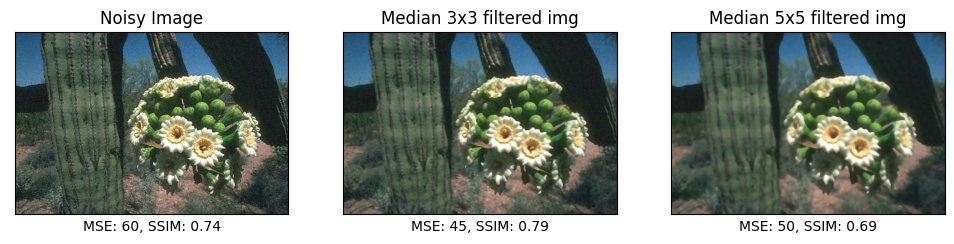

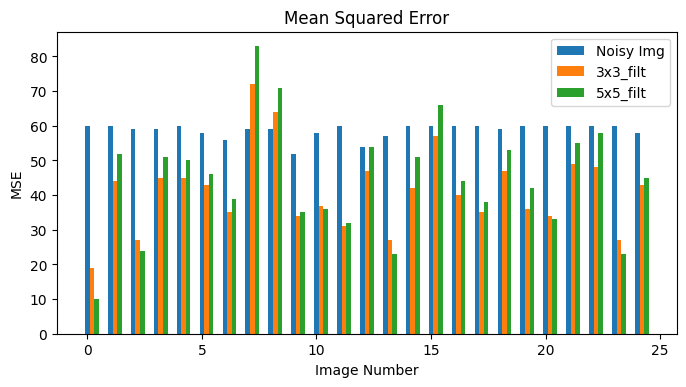

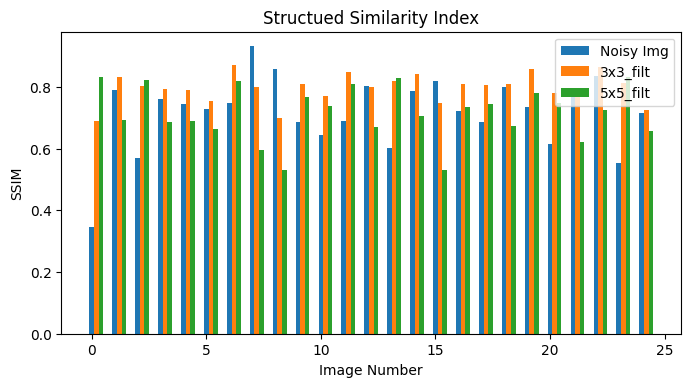

In [5]:
#Access image datasets
noisy10_im_dir = 'Task-A-Dataset-denoising\\noisy10'
org_im_dir = 'Task-A-Dataset-denoising\\original'
img_to_print = 4

n10_mse_med_3x3, n10_mse_med_5x5, n10_ssim_med_3x3, n10_ssim_med_5x5 = Median_filter(noisy10_im_dir, \
                                                                                         org_im_dir, img_to_print)

## Noisy25_ Images - Median Filter

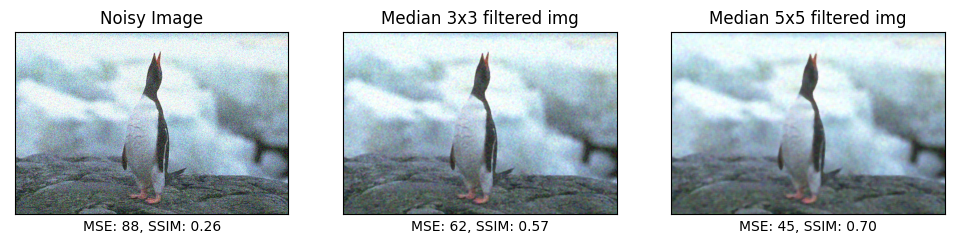

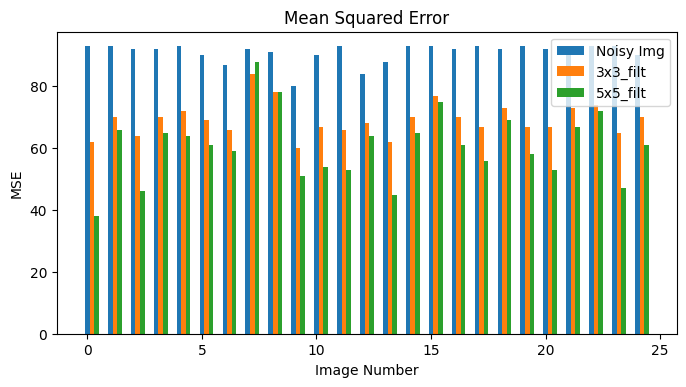

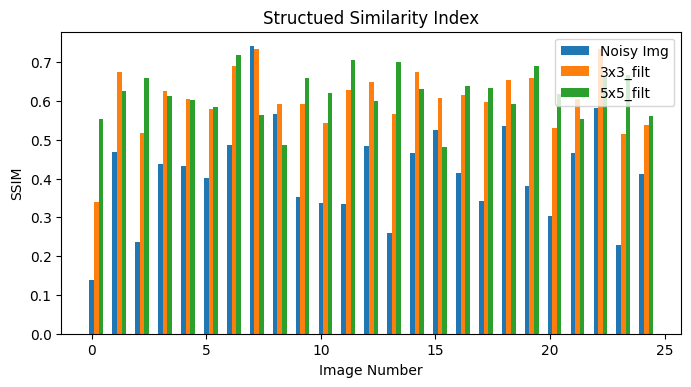

In [6]:
#Access image datasets
noisy25_im_dir = 'Task-A-Dataset-denoising\\noisy25'
org_im_dir = 'Task-A-Dataset-denoising\\original'

img_to_print = 13

n25_mse_med_3x3, n25_mse_med_5x5, n25_ssim_med_3x3, n25_ssim_med_5x5 = Median_filter(noisy25_im_dir, org_im_dir, \
                                                                                         img_to_print)

## Noisy50_ Images - Median Filter

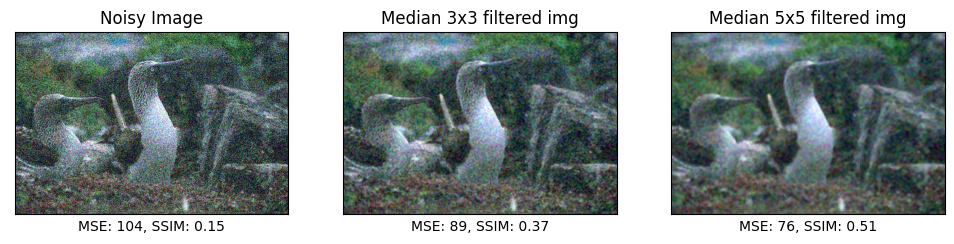

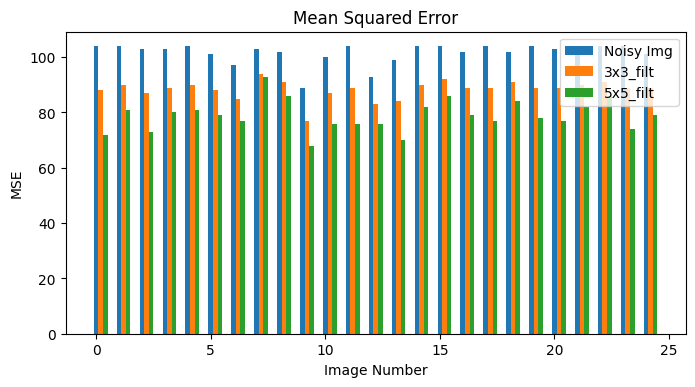

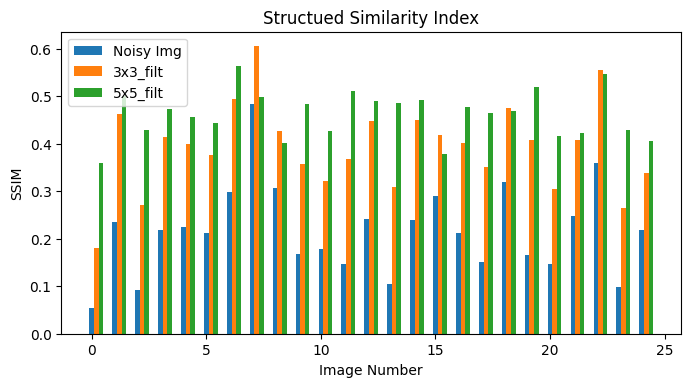

In [7]:
#Access image datasets
noisy50_im_dir = "Task-A-Dataset-denoising\\noisy50"
org_im_dir = "Task-A-Dataset-denoising\\original"
img_to_print = 11

n50_mse_med_3x3, n50_mse_med_5x5, n50_ssim_med_3x3, n50_ssim_med_5x5 = Median_filter(noisy50_im_dir, org_im_dir, \
                                                                                        img_to_print)